In [2]:
import pandas as pd
import numpy as np

In [3]:
np.random.seed(2020)
x = np.linspace(0, 10, 12)
xy_df = pd.DataFrame({
    "x" : x,
    "y" : x ** 2 - 7 * x + 2 * np.random.normal(size=12)
})
xy_df

,x,y
0,0.000000,-3.537691
1,0.909091,-5.386086
2,1.818182,-11.682747
3,2.727273,-12.955753
4,3.636364,-14.017636
5,4.545455,-13.705227
6,5.454545,-8.552061
7,6.363636,-3.920559
8,7.272727,2.803697
9,8.181818,8.523657


<Axes: xlabel='x', ylabel='y'>

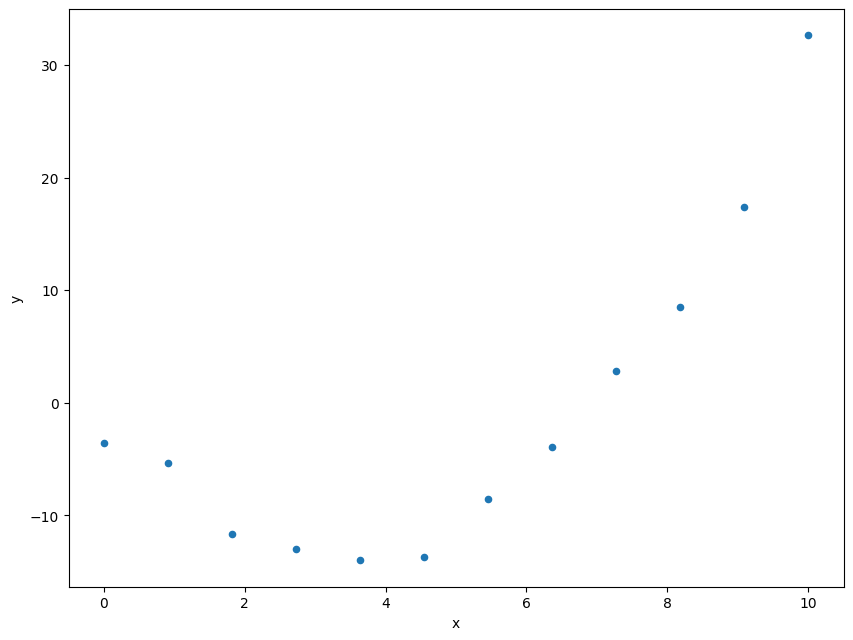

In [4]:
xy_df.plot.scatter(x="x", y="y", figsize=(10, 7.5))


In [13]:
xy_df["x**2"] = xy_df["x"] ** 2

In [5]:
import matplotlib.pyplot as plt

In [8]:
from sklearn.linear_model import LinearRegression

In [6]:
def draw_line(a, b, x_min, x_max):
    x = np.linspace(x_min, x_max, 1000)
    y = a * x + b
    plt.plot(x, y, "-r", c=(.75,.1,.1,.25))
    

In [14]:
X = xy_df.drop("y", axis="columns")

In [15]:
lr = LinearRegression()
lr.fit(X, xy_df["y"])


LinearRegression()

In [16]:
lr.coef_, lr.intercept_

(array([-6.87839988,  1.01806729]), np.float64(-2.1194981651308833))

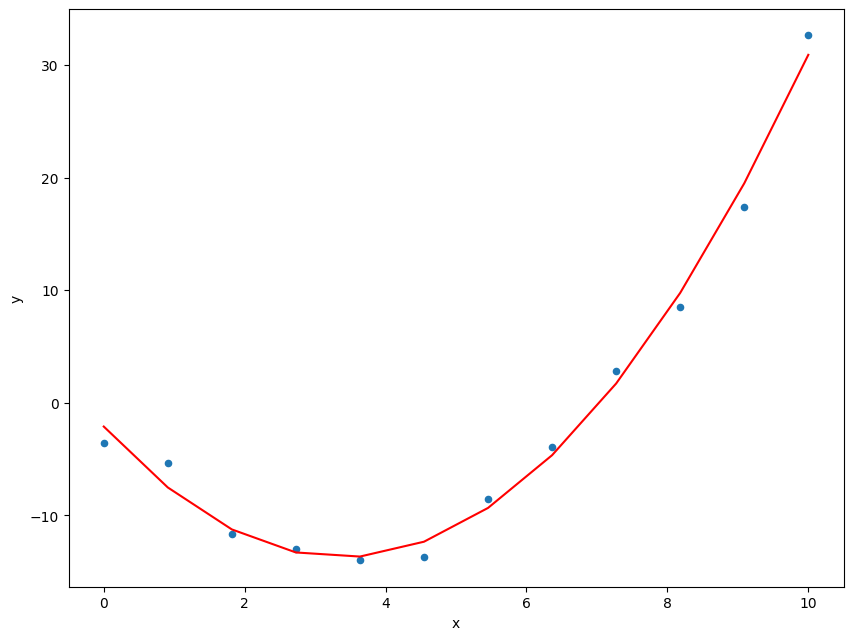

In [17]:
xy_df.plot.scatter(x="x", y="y", figsize=(10, 7.5))
plt.plot(X["x"], lr.predict(X), "-r")

### Uogólnione podejście w scikit-learn


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [19]:
pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("polynomial", PolynomialFeatures(degree=15)),
    ("linalg", LinearRegression()),
])
pipeline.fit(xy_df[["x"]], xy_df["y"])

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=15)),
                ('linalg', LinearRegression())])

In [20]:
pipeline.steps[2][1].coef_

array([ 2.30644748e-10,  1.89234068e+01,  1.29010612e+01, -5.60617764e+01,
        5.05398373e-01,  9.49062515e+01, -3.02681251e+00, -5.03217955e+00,
       -2.54989729e+00, -5.19510055e+01,  4.87638405e-02, -2.09113225e+01,
        2.63897848e+00,  4.09874721e+01, -8.33197736e-01, -1.03062217e+01])

/home/maciej/deep/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


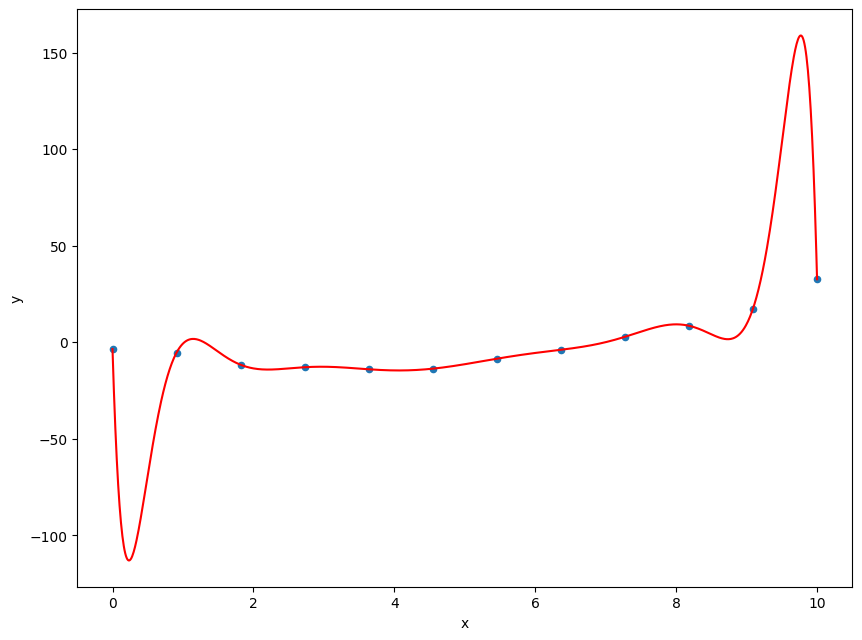

In [21]:
xy_df.plot.scatter(x="x", y="y", figsize=(10, 7.5))
x = np.linspace(0, 10, 1000)
plt.plot(x, pipeline.predict(x.reshape(-1, 1)), "-r")

/home/maciej/deep/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


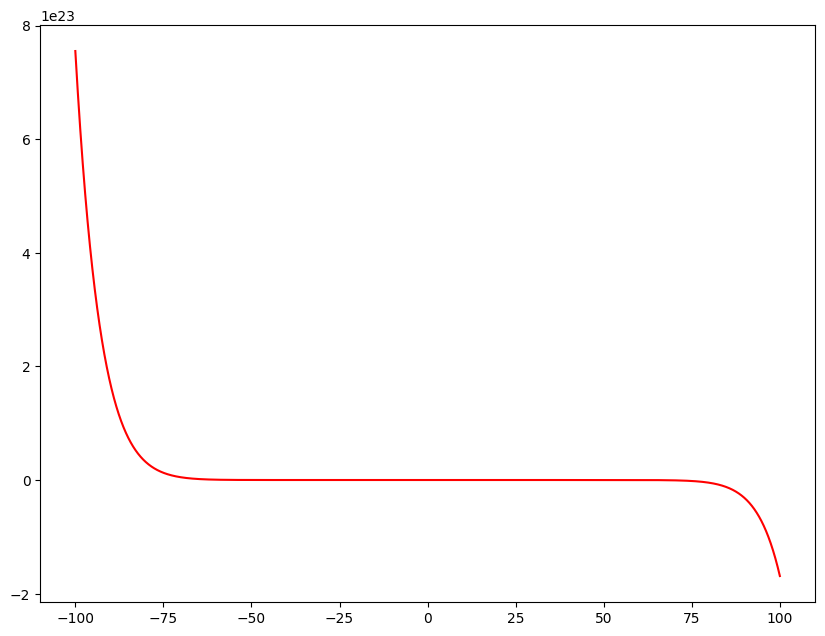

In [22]:
plt.figure(figsize=(10.0, 7.5))
x = np.linspace(-100, 100, 10000)
plt.plot(x, pipeline.predict(x.reshape(-1, 1)), "-r")

In [23]:
from sklearn.linear_model import Lasso

In [24]:
pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("polynomial_features", PolynomialFeatures(degree=15)),
    ("regressor", Lasso(alpha=10.0)),
])
pipeline.fit(xy_df[["x"]], xy_df["y"])
pipeline.steps[2][1].coef_

/home/maciej/deep/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.106e+00, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.18925292,  0.4165586 ,  0.        ,  0.        , -0.        ,
       -0.04759072])

/home/maciej/deep/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


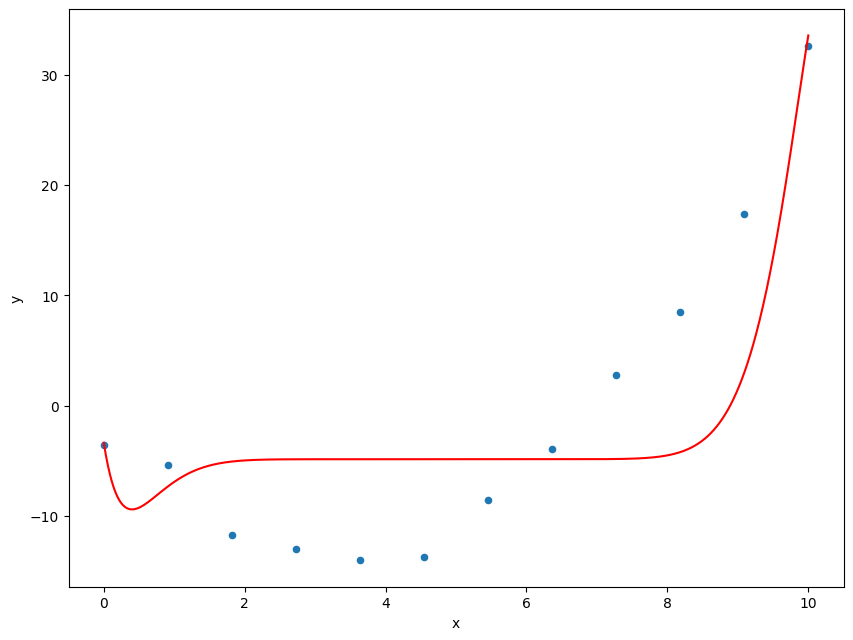

In [25]:
xy_df.plot.scatter(x="x", y="y", figsize=(10, 7.5))
x = np.linspace(0, 10, 1000)
plt.plot(x, pipeline.predict(x.reshape(-1, 1)), "-r")

/home/maciej/deep/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


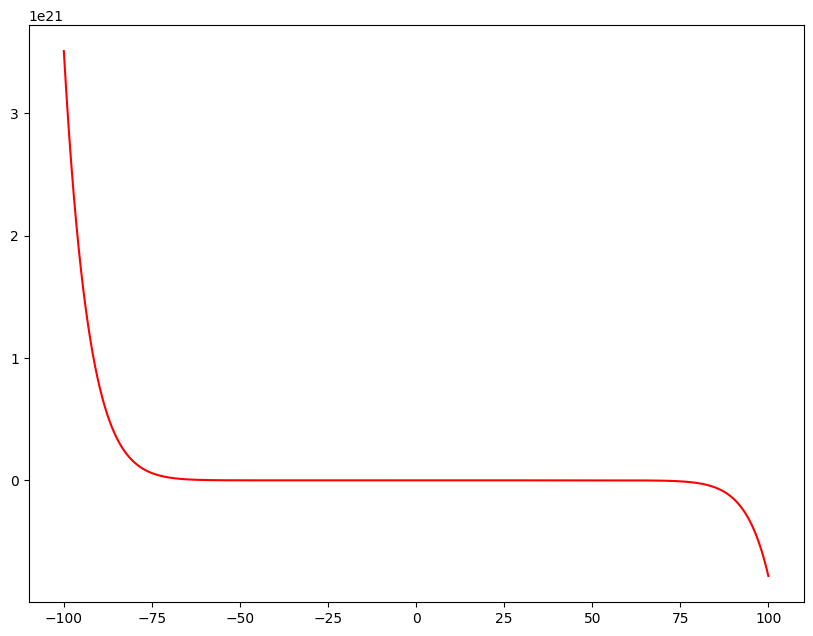

In [27]:
plt.figure(figsize=(10.0, 7.5))
x = np.linspace(-100, 100, 10000)
plt.plot(x, pipeline.predict(x.reshape(-1, 1)), "-r")

In [28]:
from sklearn.model_selection import GridSearchCV

In [33]:
cv = GridSearchCV(estimator=pipeline, param_grid={
    "polynomial_features__degree" : range(1, 15),
    "regressor__alpha": np.linspace(0.5, 100.0, 10),
})

/home/maciej/deep/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.854e-01, tolerance: 1.625e-01
  model = cd_fast.enet_coordinate_descent(
/home/maciej/deep/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.930e+00, tolerance: 2.130e-01
  model = cd_fast.enet_coordinate_descent(
/home/maciej/deep/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.841e-

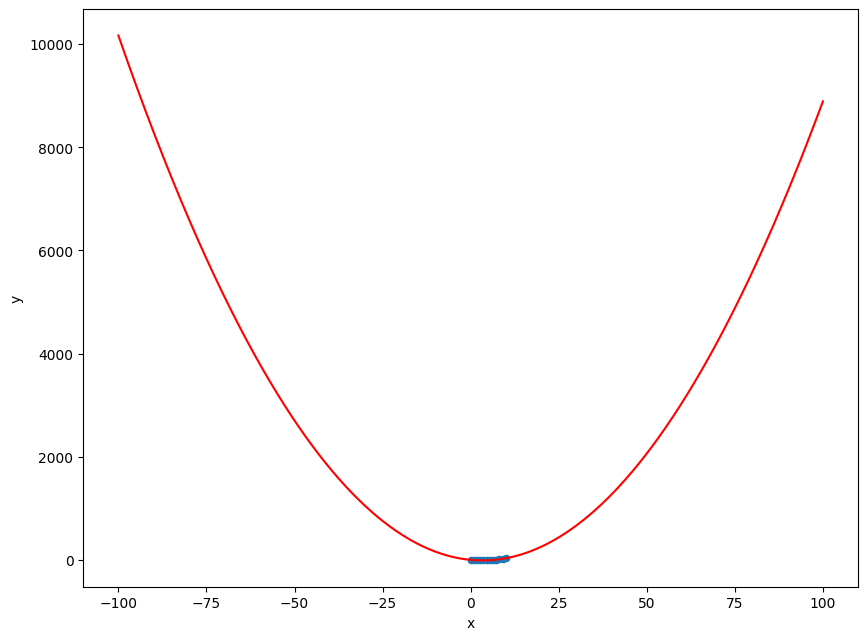

In [34]:
cv.fit(xy_df[["x"]], xy_df["y"])
xy_df.plot.scatter(x="x", y="y", figsize=(10,7.5))
plt.plot(x, cv.predict(x.reshape(-1, 1)), "-r")

In [35]:
cv.best_estimator_.steps[2][1].coef_

array([0.        , 9.86329097, 9.38802746])

/home/maciej/deep/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


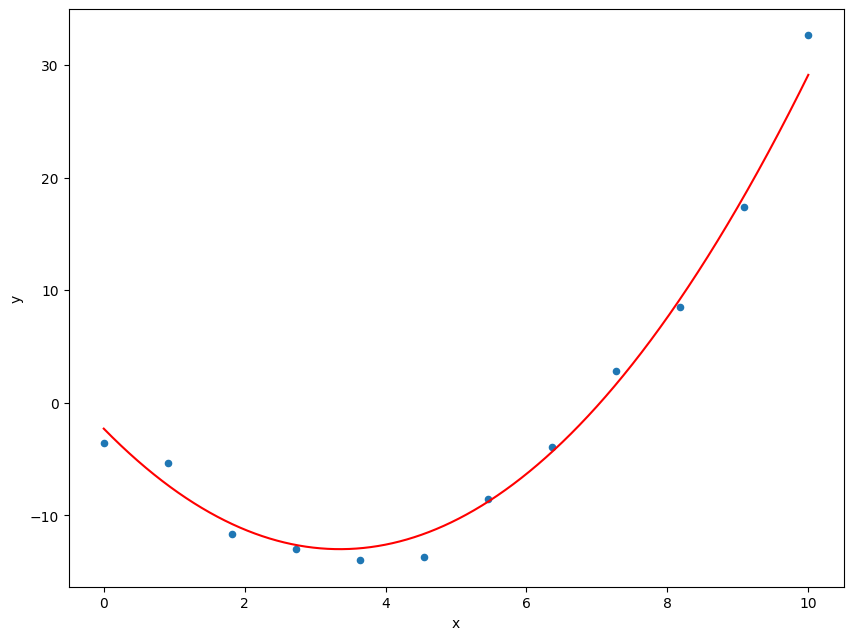

In [36]:
x = np.linspace(0, 10, 10000)
xy_df.plot.scatter(x="x", y="y", figsize=(10, 7.5))
plt.plot(x, cv.predict(x.reshape(-1, 1)), "-r")